In [0]:
 pip install fastai==0.7.0

In [0]:

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [0]:
!unzip bluebook-for-bulldozers.zip

In [0]:
!unzip Train.zip

In [0]:

#PATH = "data/bulldozers/"
df_raw = pd.read_csv('Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
display_all(df_raw.SalePrice[:20])
df_raw.SalePrice = np.log(df_raw.SalePrice) 
display_all(df_raw.SalePrice[:20])

In [0]:
display_all(df_raw.saledate[:20])

In [0]:
df_raw.shape

(401125, 53)

In [0]:
add_datepart(df_raw,'saledate')

In [0]:
df_raw.shape

(401125, 65)

In [0]:
display_all(df_raw[:5])UsageBand

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200


In [0]:
train_cats(df_raw)

In [0]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [0]:
#df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [0]:
df_raw.isnull().sum().sort_index()/len(df_raw)

Backhoe_Mounting     0.803872
Blade_Extension      0.937129
Blade_Type           0.800977
Blade_Width          0.937129
Coupler              0.466620
                       ...   
saleIs_year_start    0.000000
saleMonth            0.000000
saleWeek             0.000000
saleYear             0.000000
state                0.000000
Length: 65, dtype: float64

In [0]:
df_raw.to_feather('/content/drive/My Drive/processed training data')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_raw  = pd.read_feather('/content/drive/My Drive/processed training data')

In [0]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [0]:
X, Y, nas = proc_df(df_raw,'SalePrice')

In [0]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
m.score(X, Y)

0.983064240635285

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df_raw)-n_valid

In [0]:
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(Y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = {'training RMSE  '   : rmse(m.predict(X_train), y_train), 
           'validation RMSE' : rmse(m.predict(X_valid), y_valid),
           'training R2    '     : m.score(X_train, y_train), 
           'validation R2  '   : m.score(X_valid, y_valid),
           'oob'             : 'none'}
    if hasattr(m, 'oob_score_'): res['oob'] = m.oob_score_
    for key in res:
      print(key,':',res[key])


In [0]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 39s, sys: 273 ms, total: 1min 40s
Wall time: 51.1 s
training RMSE   : 0.09074003681829416
validation RMSE : 0.24687247216950178
training R2     : 0.9827919076386794
validation R2   : 0.8911588038107061
oob : none


In [0]:
m = RandomForestRegressor(n_estimators=160, n_jobs=-1)
m.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [0]:
print_score(m)

training RMSE   : 0.07497394775511201
validation RMSE : 0.2341552660524582
training R2     : 0.9882522259608307
validation R2   : 0.9020835109787934
oob : none


In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

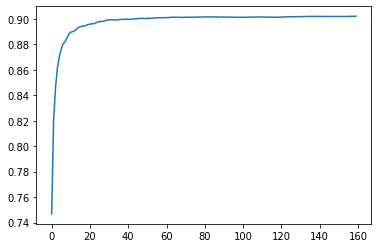

In [0]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(160)]);

In [0]:
m60 = RandomForestRegressor(n_estimators=60, n_jobs=-1)
m60.fit(X_train, y_train)
print_score(m60)

training RMSE   : 0.07683947342278231
validation RMSE : 0.23597080796569467
training R2     : 0.9876603288469681
validation R2   : 0.9005592174988207
oob : none


In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [0]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

In [0]:
m = RandomForestRegressor(n_estimators=100,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.09334323093268157
validation RMSE : 0.34414233974397507
training R2     : 0.9808148494481438
validation R2   : 0.7884932713656249
oob : none


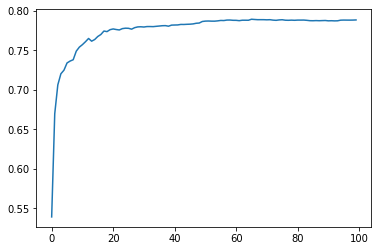

In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(100)]);

## ###############      OOB       ##############

In [0]:
m60oob = RandomForestRegressor(n_estimators=60, n_jobs=-1, oob_score=True)
m60oob.fit(X_train, y_train)
print_score(m60oob)

training RMSE   : 0.09577036998024331
validation RMSE : 0.34481673897686677
training R2     : 0.97993224865518
validation R2   : 0.7876634999518133
oob : 0.8557487186955036


## !!!!!!!!!!!!!!!!!!!!!    reduce overfitting !!!!!!!!!!!!!!!!!!!!

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
set_rf_samples(20000)

In [0]:
m50oob = RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True)
m50oob.fit(X_train, y_train)
print_score(m50oob)

training RMSE   : 0.2268483345399826
validation RMSE : 0.2615997552025817
training R2     : 0.8924510892169446
validation R2   : 0.8777855266902777
oob : 0.8809429049326237


In [0]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)


In [0]:
m = RandomForestRegressor(n_estimators=50,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.2261823633568559
validation RMSE : 0.2613114961565933
training R2     : 0.8930816368428672
validation R2   : 0.878054716679761
oob : none


In [0]:
for treee in m.estimators_:
  print(dectree_max_depth(treee.tree_),end=',')

36,37,36,35,36,35,33,33,34,33,35,33,33,33,32,36,32,33,37,36,36,33,33,33,36,40,33,31,34,33,34,36,33,34,35,37,34,33,35,36,33,36,35,35,33,35,33,38,37,34,

In [0]:
m = RandomForestRegressor(n_estimators=50,min_samples_leaf=5,n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)
for treee in m.estimators_:
  print(dectree_max_depth(treee.tree_),end=',')

training RMSE   : 0.23775240440763806
validation RMSE : 0.2652684033710398
training R2     : 0.8818633472678453
validation R2   : 0.8743336442982594
oob : none
28,27,26,25,26,26,25,30,24,27,29,26,25,26,28,31,25,26,26,26,26,25,27,26,27,25,27,27,24,26,30,25,25,26,26,25,24,26,27,26,25,27,26,26,25,28,26,24,26,26,

In [0]:
set_rf_samples(200000)
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.1801033982874967
validation RMSE : 0.24031385525666388
training R2     : 0.9322079696818135
validation R2   : 0.8968651134011386
oob : 0.9023097430712895


In [0]:
reset_rf_samples()
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.11435821668263065
validation RMSE : 0.23361473700769672
training R2     : 0.9726681156337927
validation R2   : 0.902535054252584
oob : 0.909724762223174


In [0]:
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3,max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.11872174176560635
validation RMSE : 0.22764758809122548
training R2     : 0.9705425367115192
validation R2   : 0.9074504991736266
oob : 0.9127091538736473


## **INTERPRETAION**

feature importance

In [0]:
set_rf_samples(50000)

In [16]:
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.2050800423352056
validation RMSE : 0.24824940960942488
training R2     : 0.9121014678016683
validation R2   : 0.8899412888593695
oob : 0.8938488589002461


In [17]:
print_score(m)

training RMSE   : 0.2050800423352056
validation RMSE : 0.24824940960942488
training R2     : 0.9121014678016683
validation R2   : 0.8899412888593695
oob : 0.8938488589002461


In [18]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
37,Coupler_System,0.204198
5,YearMade,0.182016
13,ProductSize,0.118145
14,fiProductClassDesc,0.103220
2,ModelID,0.090270
63,saleElapsed,0.074617
19,Enclosure,0.039018
10,fiSecondaryDesc,0.026372
8,fiModelDesc,0.025591
0,SalesID,0.024179


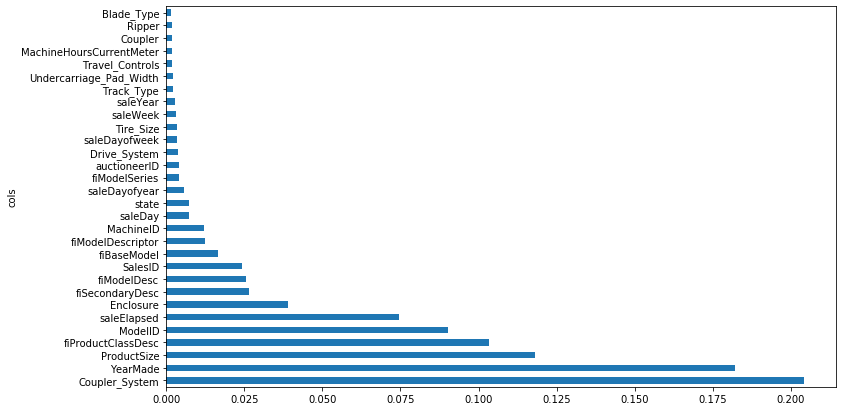

In [19]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [20]:
cols_to_keep = fi[fi.imp>0.005].cols
len(cols_to_keep)

16

In [0]:
df_keep = df_trn[cols_to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [22]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 16), (389125,), (12000, 16), (12000,))

In [23]:
set_rf_samples(50000)
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.2071602911796347
validation RMSE : 0.2478256092482504
training R2     : 0.9103092095180184
validation R2   : 0.890316742788896
oob : 0.8922065489647362


# **ONE HOT ENCODING**

In [23]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
set_rf_samples(50000)
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.20714773634231584
validation RMSE : 0.25315796079130143
training R2     : 0.9103200805122149
validation R2   : 0.8855459535562825
oob : 0.8916459304665308


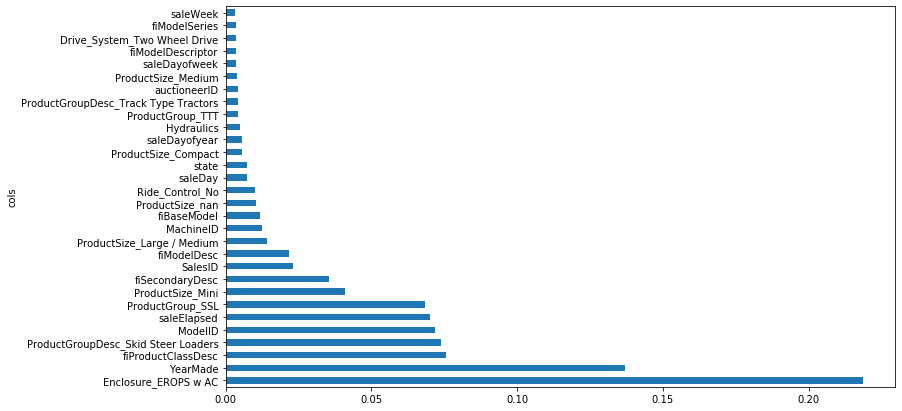

In [24]:
fi = rf_feat_importance(m, df_trn2)
fi[:30].plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

# Removing redundant features

In [0]:
 from scipy.cluster import hierarchy as hc

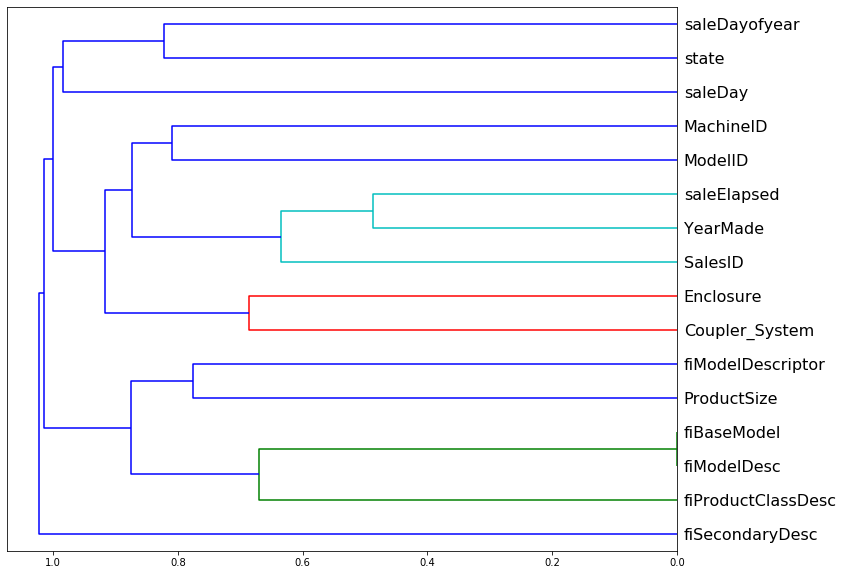

In [28]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(12,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [0]:
to_drop = ['fiBaseModel']
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)



In [0]:
reset_rf_samples()

In [32]:
m = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.11938766650484442
validation RMSE : 0.23581926643032317
training R2     : 0.9702111488998595
validation R2   : 0.9006868991401805
oob : 0.9058534321737536


# Tree interpreter

In [34]:
!pip install treeinterpreter

In [0]:
from treeinterpreter import treeinterpreter as ti

In [36]:
row = X_valid.values[None,0]; row

array([[         0,       1999,          5,         17,        665, 1284595200,          1,          0,
              3232,    4364751,          0,    2300944,         16,         35,        259]])

In [37]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 15), (389125,), (12000, 15), (12000,))

In [40]:
prediction, bias, contributions = ti.predict(m, row)
prediction[0], bias[0]

(array([9.17165]), 10.105493490189598)

In [0]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [44]:
idxs = np.argsort(contributions[0])
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.8172210521138914),
 ('saleElapsed', 1284595200, -0.06958094011298666),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.06567516682906949),
 ('fiModelDesc', 'KX1212', -0.05382301647523836),
 ('SalesID', 4364751, -0.043925314166119306),
 ('ModelID', 665, -0.038182746949701744),
 ('saleDayofyear', 259, -0.013350530018350674),
 ('Enclosure', 'EROPS', -0.0037537633925948553),
 ('state', 'Ohio', -0.00025001260426876115),
 ('fiModelDescriptor', nan, 0.0),
 ('fiSecondaryDesc', nan, 0.004312792381031763),
 ('saleDay', 16, 0.007070642922204975),
 ('YearMade', 1999, 0.020915261518689974),
 ('MachineID', 2300944, 0.034088329163834495),
 ('Coupler_System', nan, 0.10553515682135994)]

In [45]:
X_train.columns

Index(['Coupler_System', 'YearMade', 'ProductSize', 'fiProductClassDesc',
       'ModelID', 'saleElapsed', 'Enclosure', 'fiSecondaryDesc', 'fiModelDesc',
       'SalesID', 'fiModelDescriptor', 'MachineID', 'saleDay', 'state',
       'saleDayofyear'],
      dtype='object')

# final model

In [0]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)

In [47]:
X_train.columns

Index(['Coupler_System', 'YearMade', 'ProductSize', 'fiProductClassDesc',
       'ModelID', 'saleElapsed', 'Enclosure', 'fiSecondaryDesc', 'fiModelDesc',
       'fiModelDescriptor', 'saleDay', 'state'],
      dtype='object')

In [48]:
reset_rf_samples()
m = RandomForestRegressor(n_estimators=100,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

training RMSE   : 0.0835269291990088
validation RMSE : 0.22142685303308787
training R2     : 0.9854189816503502
validation R2   : 0.9124394361440524
oob : 0.9098851765945277
